In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('bestsellers.csv')

In [6]:
df.shape

(550, 7)

In [7]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [14]:
df.columns

Index(['Title', 'Author', 'Rating', 'Reviews', 'Price', 'Publication Year',
       'Genre'],
      dtype='object')

In [15]:
df.isnull().sum()

Title               0
Author              0
Rating              0
Reviews             0
Price               0
Publication Year    0
Genre               0
dtype: int64

In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             550 non-null    object 
 1   Author            550 non-null    object 
 2   Rating            550 non-null    float64
 3   Reviews           550 non-null    int64  
 4   Price             550 non-null    float64
 5   Publication Year  550 non-null    int64  
 6   Genre             550 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

In [11]:
df["Price"] = df["Price"].astype(float)

In [12]:
#Author Count
author_counts = df['Author'].value_counts()
print(author_counts)

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64


In [13]:
#Average Rating by Genre
avg_rating_by_genre=df.groupby("Genre")["Rating"].mean()
avg_rating_by_genre

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

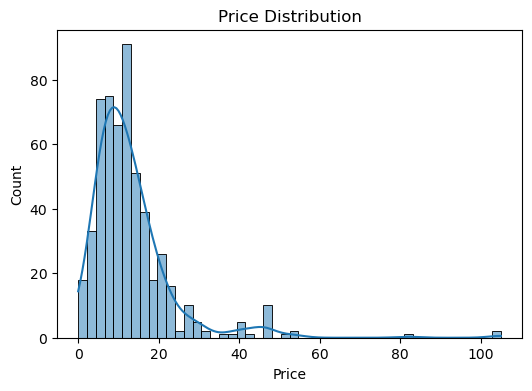

In [18]:
#Distribution of Price
plt.figure(figsize=(6,4))
sns.histplot(df['Price'],kde=True)
plt.title("Price Distribution")
plt.show

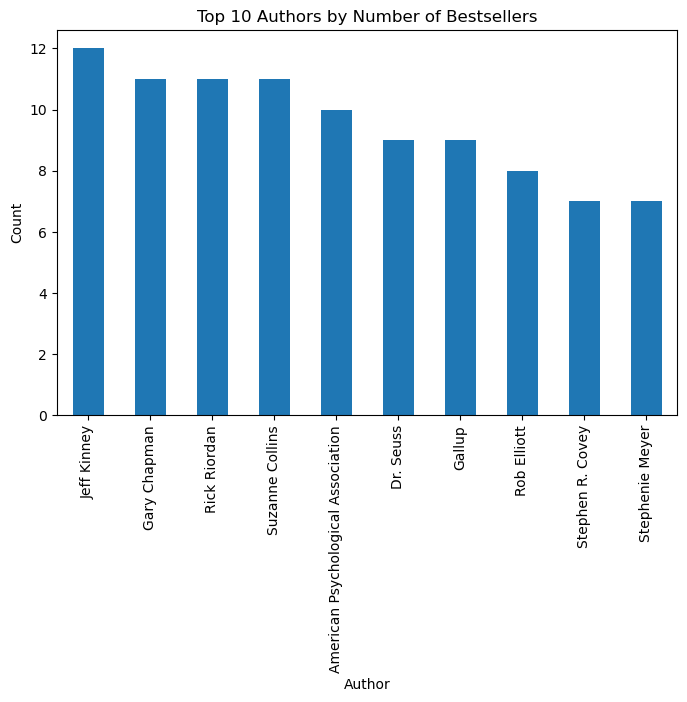

In [19]:
# Top Authors by number of bestsellers
plt.figure(figsize=(8,5))
df['Author'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Authors by Number of Bestsellers")
plt.xlabel("Author")
plt.ylabel("Count")
plt.show()

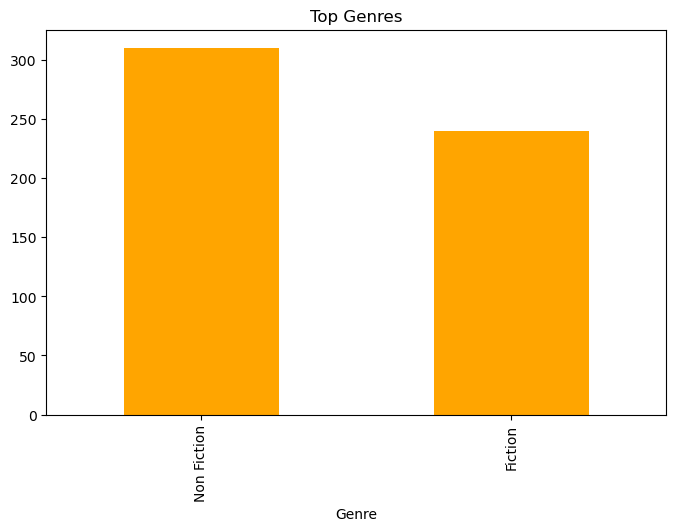

In [20]:
if "Genre" in df.columns:
    plt.figure(figsize=(8,5))
    df['Genre'].value_counts().head(10).plot(kind='bar',color='orange')
    plt.title("Top Genres")
    plt.show()

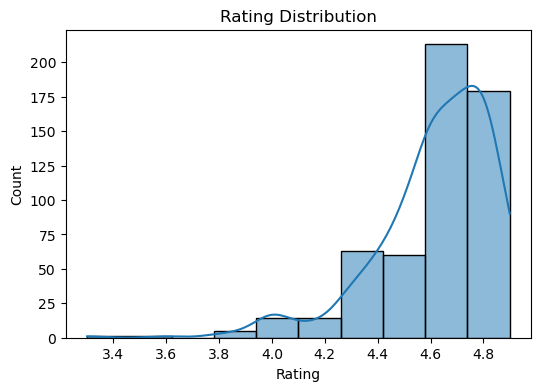

In [21]:
# Distribution of Ratings
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title("Rating Distribution")
plt.show()

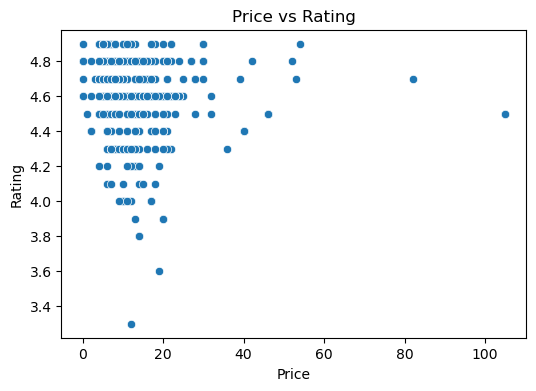

In [22]:
# Price vs Rating
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title("Price vs Rating")
plt.show()

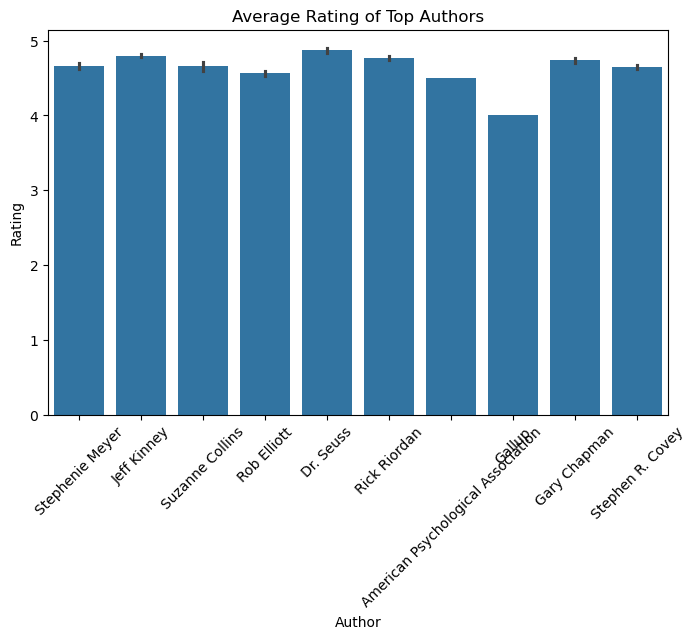

In [23]:
# Average Rating by Author (Top 10 authors)
top_authors = df['Author'].value_counts().head(10).index
plt.figure(figsize=(8,5))
sns.barplot(x='Author', y='Rating', data=df[df['Author'].isin(top_authors)])
plt.xticks(rotation=45)
plt.title("Average Rating of Top Authors")
plt.show()

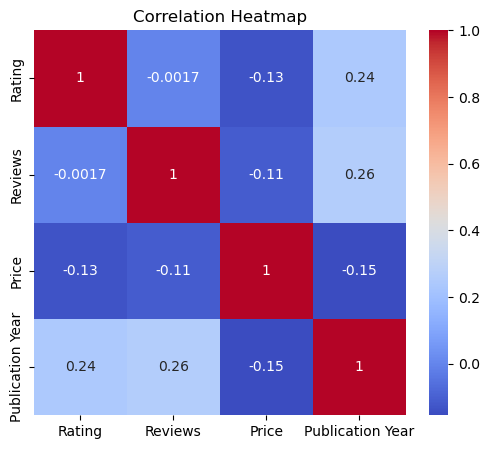

In [24]:
# Correlation heatmap (numerical columns)
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [28]:
df.head()

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


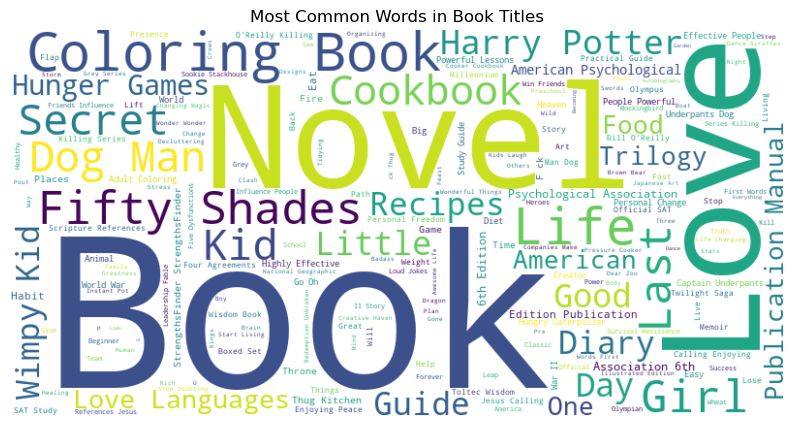

In [29]:
text = " ".join(title for title in df['Title'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Book Titles")
plt.show()


In [31]:
#Top 5 most expensive books
df[['Title','Author','Price']].sort_values(by='Price',ascending=False).head()

,Title,Author,Price
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105.0
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105.0
473,The Twilight Saga Collection,Stephenie Meyer,82.0
151,Hamilton: The Revolution,Lin-Manuel Miranda,54.0
346,The Book of Basketball: The NBA According to T...,Bill Simmons,53.0


In [32]:
# Top 5 highest rated authors
print(df.groupby('Author')['Rating'].mean().sort_values(ascending=False).head())


Author
Patrick Thorpe          4.9
Lin-Manuel Miranda      4.9
Chip Gaines             4.9
Sherri Duskey Rinker    4.9
Nathan W. Pyle          4.9
Name: Rating, dtype: float64


In [34]:
# Top 5 most reviewed authors
if "Reviews" in df.columns:
    print(df.groupby('Author')['Reviews'].sum().sort_values(ascending=False).head())

Author
Suzanne Collins    278329
John Green         210419
E L James          178011
Dr. Seuss          176545
Gillian Flynn      171813
Name: Reviews, dtype: int64
